In [1]:
import pandas as pd
df = pd.read_csv('RevisedFedData (1).csv')
df.head()


,Fed Chair,Avg Inflation,Avg Unemployment,Avg GDP growth,Avg Interest Rate Cuts,Avg Dollar Strength,Recessions
0,Thomas B. McCabe,0.0490,0.0470,0.050,0,-1.252500,1
1,William McChesney Martin Jr.,0.0220,0.0614,0.029,-150,-2.655921,3
2,Arthur F. Burns,0.0662,0.0600,0.046,-200,-4.109079,1
3,G. William Miller,0.0945,0.0770,0.046,-700,-1.732500,0
4,Paul A. Volcker,0.0500,0.0790,0.030,600,-1.451250,2


In [2]:
subset = df.iloc[:, 1:]

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=2)
subset = subset.fillna('0')

In [5]:
pca.fit(subset)
subset.dropna()


,Avg Inflation,Avg Unemployment,Avg GDP growth,Avg Interest Rate Cuts,Avg Dollar Strength,Recessions
0,0.0490,0.0470,0.050,0,-1.252500,1
1,0.0220,0.0614,0.029,-150,-2.655921,3
2,0.0662,0.0600,0.046,-200,-4.109079,1
3,0.0945,0.0770,0.046,-700,-1.732500,0
4,0.0500,0.0790,0.030,600,-1.451250,2
5,0.0260,0.0530,0.032,320,-1.191103,1
6,0.0180,0.0740,0.013,-600,-0.597647,1
7,0.0160,0.0570,0.022,-150,0.212500,0
8,0.0390,0.0490,0.021,-200,-0.521389,1


In [6]:

pca.explained_variance_ratio_

array([9.99985686e-01, 1.11999898e-05])

In [7]:
DATA = pd.DataFrame(pca.transform(subset))

In [8]:
DATA.head()

,0,1
0,119.999838,0.294290
1,-29.998166,-1.829020
2,-80.000103,-2.411990
3,-580.000809,-0.016333
4,720.000524,-0.057526


<Axes: xlabel='0', ylabel='1'>

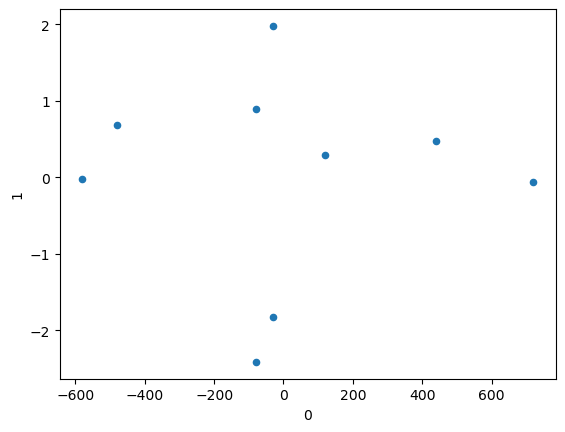

In [9]:
DATA.plot(kind='scatter' , x=0,y=1)

In [10]:
DATA.head()

,0,1
0,119.999838,0.294290
1,-29.998166,-1.829020
2,-80.000103,-2.411990
3,-580.000809,-0.016333
4,720.000524,-0.057526


In [11]:
import numpy as np

<Axes: xlabel='x_jitter', ylabel='y_jitter'>

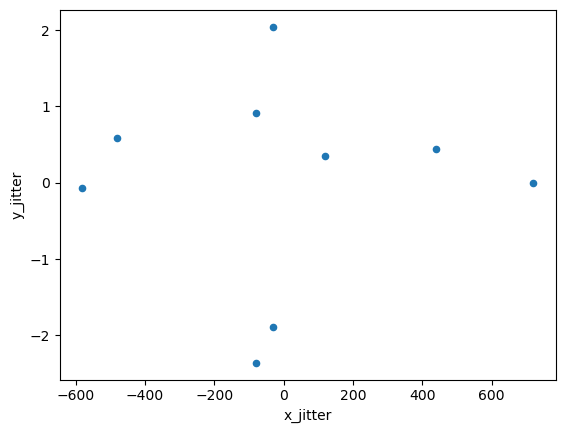

In [12]:
df['x_jitter'] = DATA[0] + np.random.randn(9)*.1
df['y_jitter'] = DATA[1] + np.random.randn(9)*.1
df.plot(kind = 'scatter', x = 'x_jitter', y = 'y_jitter')

In [13]:
df.head()

,Fed Chair,Avg Inflation,Avg Unemployment,Avg GDP growth,Avg Interest Rate Cuts,Avg Dollar Strength,Recessions,x_jitter,y_jitter
0,Thomas B. McCabe,0.0490,0.0470,0.050,0,-1.252500,1,120.184387,0.348933
1,William McChesney Martin Jr.,0.0220,0.0614,0.029,-150,-2.655921,3,-29.934760,-1.891799
2,Arthur F. Burns,0.0662,0.0600,0.046,-200,-4.109079,1,-79.882104,-2.359977
3,G. William Miller,0.0945,0.0770,0.046,-700,-1.732500,0,-580.135542,-0.074675
4,Paul A. Volcker,0.0500,0.0790,0.030,600,-1.451250,2,720.037908,0.003140


In [14]:
df.to_csv('Fed_Data_PCA_EVISED.csv', index=False)